In [ ]:
import zipfile
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# unzip the downloaded files
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-11-12 08:30:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.7MB/s    in 5.7s    

2023-11-12 08:30:33 (18.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## inspection of  data
* become a model for understanding it better

In [ ]:
!ls pizza_steak/test

pizza  steak


In [ ]:
!ls pizza_steak/test/pizza

1001116.jpg  1459760.jpg  2082495.jpg  254812.jpg   328965.jpg	 3785667.jpg  625434.jpg
1032754.jpg  1475479.jpg  2101820.jpg  2549661.jpg  3296507.jpg  3793004.jpg  645087.jpg
103708.jpg   1484836.jpg  2111981.jpg  2572488.jpg  3296907.jpg  380739.jpg   648055.jpg
1060407.jpg  148765.jpg   2124579.jpg  2582289.jpg  3316410.jpg  3814200.jpg  65128.jpg
106507.jpg   1503858.jpg  212995.jpg   2583389.jpg  331644.jpg	 3827990.jpg  666569.jpg
1067986.jpg  1506213.jpg  2157510.jpg  2605853.jpg  335474.jpg	 3898047.jpg  678708.jpg
1106738.jpg  1507019.jpg  2161321.jpg  2615100.jpg  3375083.jpg  3913440.jpg  714866.jpg
1119571.jpg  1512557.jpg  2165223.jpg  2619955.jpg  3376617.jpg  3919151.jpg  723745.jpg
11297.jpg    153195.jpg   2195935.jpg  2631321.jpg  3385460.jpg  395662.jpg   724290.jpg
1152100.jpg  1555015.jpg  2203687.jpg  2719697.jpg  3392194.jpg  397910.jpg   728260.jpg
1179703.jpg  1594097.jpg  2218680.jpg  2782998.jpg  341377.jpg	 398345.jpg   729262.jpg
1180001.jpg  1618659.jpg  

In [ ]:
import os
for dirpath,dirname,filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirname)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in 'pizza_steak'.
there are 2 directories and 0 images in 'pizza_steak/test'.
there are 0 directories and 250 images in 'pizza_steak/test/steak'.
there are 0 directories and 250 images in 'pizza_steak/test/pizza'.
there are 2 directories and 0 images in 'pizza_steak/train'.
there are 0 directories and 750 images in 'pizza_steak/train/steak'.
there are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Nov 12 08:30 .
drwxr-xr-x 1 root root 4096 Nov 12 08:30 ..
drwxr-xr-x 4 root root 4096 Nov 12 08:30 test
drwxr-xr-x 4 root root 4096 Nov 12 08:30 train


In [ ]:
no_steak_images=len(os.listdir("pizza_steak/train/steak"))
no_steak_images

750

visulaize our images

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  target_folder =target_dir+target_class
  print(target_folder)
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape :{img.shape}")#show the shape of the image
  return img

pizza_steak/train/pizza
['3549765.jpg']
Image shape :(512, 512, 3)


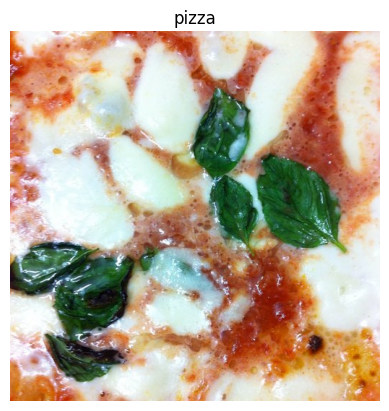

In [ ]:
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="pizza")


In [ ]:
img

array([[[207, 103,  64],
        [211, 110,  66],
        [218, 122,  72],
        ...,
        [236, 222, 221],
        [236, 222, 221],
        [235, 221, 220]],

       [[200,  94,  54],
        [206, 103,  58],
        [216, 119,  68],
        ...,
        [238, 224, 223],
        [237, 223, 222],
        [236, 222, 221]],

       [[207,  99,  53],
        [216, 110,  62],
        [225, 124,  70],
        ...,
        [240, 226, 225],
        [239, 225, 224],
        [238, 224, 223]],

       ...,

       [[203,  67,   5],
        [203,  69,   6],
        [204,  72,   8],
        ...,
        [225, 126,  67],
        [225, 132,  75],
        [223, 132,  77]],

       [[202,  64,   2],
        [202,  66,   4],
        [202,  73,   8],
        ...,
        [226, 132,  71],
        [222, 133,  77],
        [215, 128,  74]],

       [[196,  58,   0],
        [196,  60,   0],
        [196,  67,   2],
        ...,
        [235, 142,  81],
        [225, 135,  82],
        [210, 125,  71]]

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[207, 103,  64],
        [211, 110,  66],
        [218, 122,  72],
        ...,
        [236, 222, 221],
        [236, 222, 221],
        [235, 221, 220]],

       [[200,  94,  54],
        [206, 103,  58],
        [216, 119,  68],
        ...,
        [238, 224, 223],
        [237, 223, 222],
        [236, 222, 221]],

       [[207,  99,  53],
        [216, 110,  62],
        [225, 124,  70],
        ...,
        [240, 226, 225],
        [239, 225, 224],
        [238, 224, 223]],

       ...,

       [[203,  67,   5],
        [203,  69,   6],
        [204,  72,   8],
        ...,
        [225, 126,  67],
        [225, 132,  75],
        [223, 132,  77]],

       [[202,  64,   2],
        [202,  66,   4],
        [202,  73,   8],
        ...,
        [226, 132,  71],
        [222, 133,  77],
        [215, 128,  74]],

       [[196,  58,   0],
        [196,  60,   0],
        [196,  67,   2],
        ...,
        [235, 142,  8

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
img/255.

array([[[0.81176471, 0.40392157, 0.25098039],
        [0.82745098, 0.43137255, 0.25882353],
        [0.85490196, 0.47843137, 0.28235294],
        ...,
        [0.9254902 , 0.87058824, 0.86666667],
        [0.9254902 , 0.87058824, 0.86666667],
        [0.92156863, 0.86666667, 0.8627451 ]],

       [[0.78431373, 0.36862745, 0.21176471],
        [0.80784314, 0.40392157, 0.22745098],
        [0.84705882, 0.46666667, 0.26666667],
        ...,
        [0.93333333, 0.87843137, 0.8745098 ],
        [0.92941176, 0.8745098 , 0.87058824],
        [0.9254902 , 0.87058824, 0.86666667]],

       [[0.81176471, 0.38823529, 0.20784314],
        [0.84705882, 0.43137255, 0.24313725],
        [0.88235294, 0.48627451, 0.2745098 ],
        ...,
        [0.94117647, 0.88627451, 0.88235294],
        [0.9372549 , 0.88235294, 0.87843137],
        [0.93333333, 0.87843137, 0.8745098 ]],

       ...,

       [[0.79607843, 0.2627451 , 0.01960784],
        [0.79607843, 0.27058824, 0.02352941],
        [0.8       , 0

* rescale means it will normalize by dividing the 255
* esigned for image data preprocessing and augmentation during the training of deep learning models,

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 32s 275ms/step - loss: 0.5668 - accuracy: 0.7100 - val_loss: 0.4074 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4461 - accuracy: 0.8087 - val_loss: 0.3791 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4204 - accuracy: 0.8153 - val_loss: 0.3996 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 6s 118ms/step - loss: 0.3536 - accuracy: 0.8553 - val_loss: 0.3361 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 7s 146ms/step - loss: 0.3003 - accuracy: 0.8773 - val_loss: 0.3582 - val_accuracy: 0.8360


* Parameters that are not trainable, usually found in layers like max pooling or batch normalization.

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

 * In order to produce the output of the convolutional neuron (activation map), we must perform an elementwise dot product with the output of the previous layer and the unique kernel learned by the network

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 136ms/step - loss: 0.6935 - accuracy: 0.5007 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 161ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 221ms/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 144ms/step - loss: 0.6932 - accuracy: 0.4787 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* trainable paramter as petterns a model can learn from data
*  a convolutional neural network seeks to sort out and learn the most important patterns in an image.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 111ms/step - loss: 3.4785 - accuracy: 0.6000 - val_loss: 1.1478 - val_accuracy: 0.6440
Epoch 2/5
47/47 [==============================] - 7s 147ms/step - loss: 0.7297 - accuracy: 0.7167 - val_loss: 0.4893 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6435 - accuracy: 0.7300 - val_loss: 0.9563 - val_accuracy: 0.5660
Epoch 4/5
47/47 [==============================] - 7s 144ms/step - loss: 0.5082 - accuracy: 0.7867 - val_loss: 0.7487 - val_accuracy: 0.6840
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4801 - accuracy: 0.7940 - val_loss: 0.5332 - val_accuracy: 0.7580


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


pizza_steak/train/steak
['231296.jpg']
Image shape :(382, 512, 3)
pizza_steak/train/pizza
['1980167.jpg']
Image shape :(341, 512, 3)


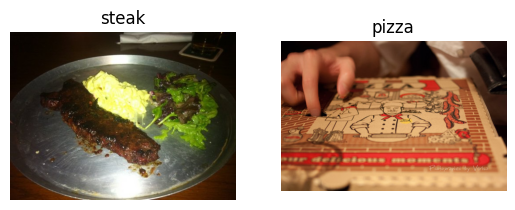

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

In [ ]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

* The ImageDataGenerator class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [ ]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
model_4=Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [ ]:
model_4.compile(loss='binary_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 166ms/step - loss: 1.1147 - accuracy: 0.6007 - val_loss: 0.6617 - val_accuracy: 0.6120
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.6279 - accuracy: 0.6720 - val_loss: 0.5793 - val_accuracy: 0.6660
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.5147 - accuracy: 0.7733 - val_loss: 0.4773 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 7s 156ms/step - loss: 0.3424 - accuracy: 0.8580 - val_loss: 0.4388 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.1858 - accuracy: 0.9400 - val_loss: 0.4325 - val_accuracy: 0.8000


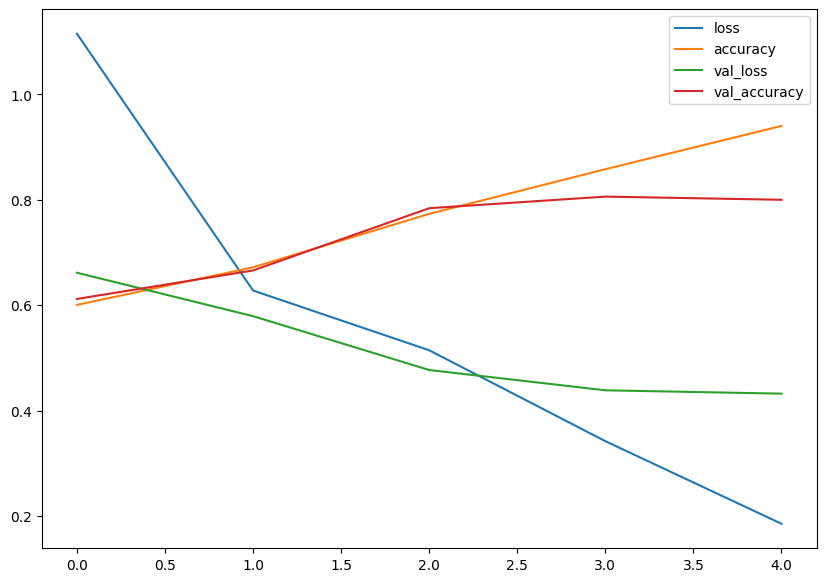

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

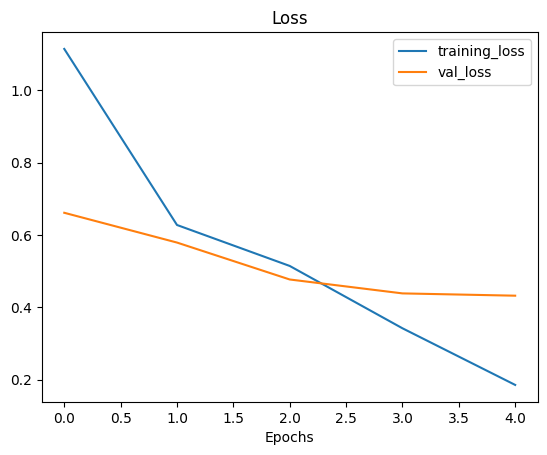

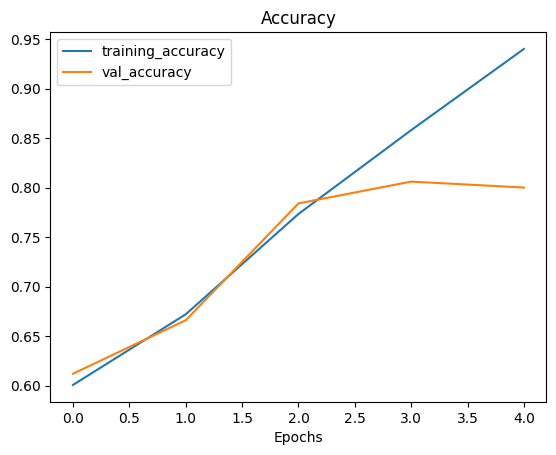

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [ ]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history=model_5.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 158ms/step - loss: 0.6226 - accuracy: 0.6447 - val_loss: 0.5240 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 7s 140ms/step - loss: 0.4959 - accuracy: 0.7613 - val_loss: 0.3784 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4436 - accuracy: 0.7980 - val_loss: 0.4201 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 6s 138ms/step - loss: 0.3921 - accuracy: 0.8233 - val_loss: 0.3431 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3642 - accuracy: 0.8487 - val_loss: 0.3460 - val_accuracy: 0.8340


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

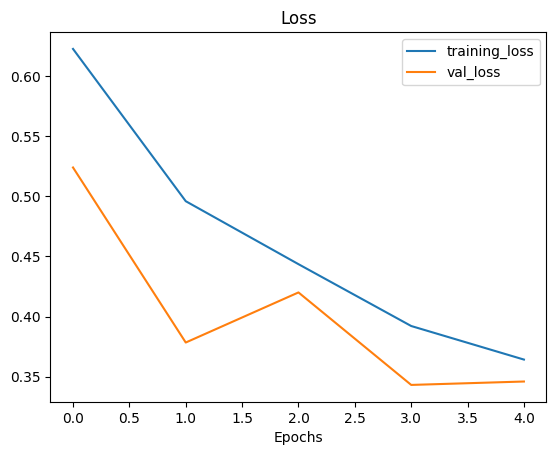

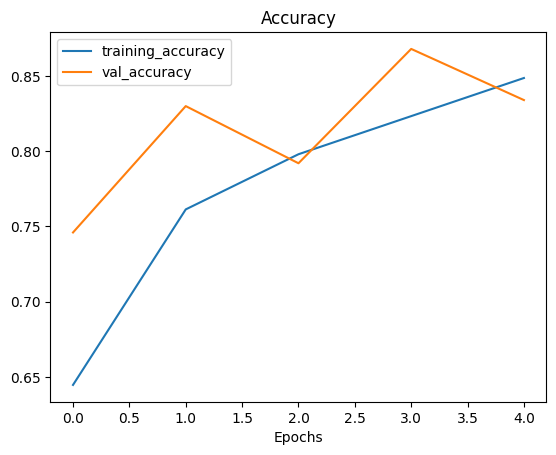

In [ ]:
plot_loss_curves(history)

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=20,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True)
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
images,labels=train_data.next()
augmented_images,augmented_labels=train_data_augmented.next()

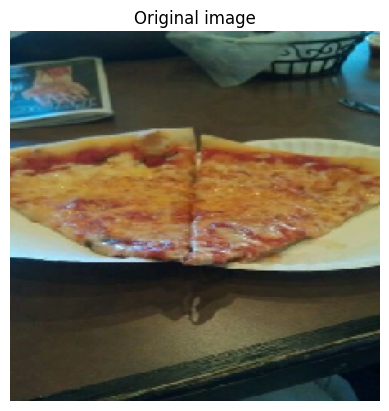

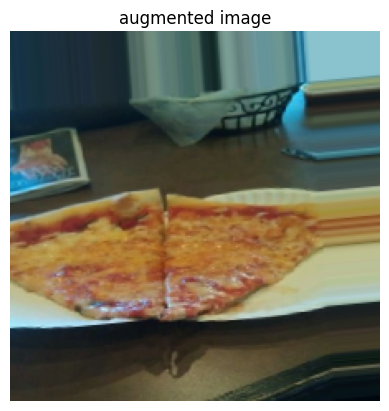

In [ ]:
random_number=random.randint(0,31)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'augmented image')
plt.axis(False);

In [ ]:
model_6=Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2), # reduce number of features by half
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
history_6= model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 33s 661ms/step - loss: 0.8755 - accuracy: 0.5927 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 539ms/step - loss: 0.6972 - accuracy: 0.4860 - val_loss: 0.6630 - val_accuracy: 0.7140
Epoch 3/5
47/47 [==============================] - 29s 622ms/step - loss: 0.6938 - accuracy: 0.6293 - val_loss: 0.6136 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 31s 657ms/step - loss: 0.6612 - accuracy: 0.6487 - val_loss: 0.5923 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 33s 701ms/step - loss: 0.6534 - accuracy: 0.6420 - val_loss: 0.5733 - val_accuracy: 0.7980


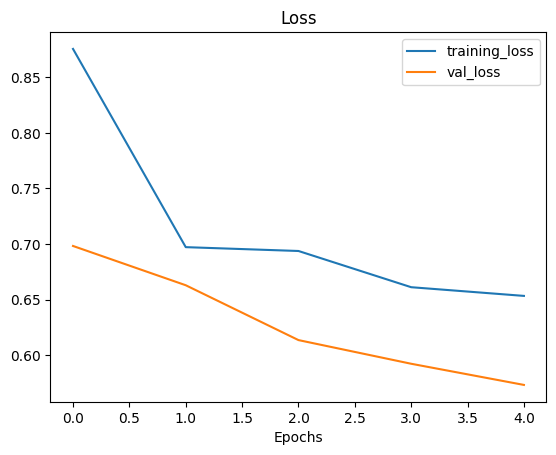

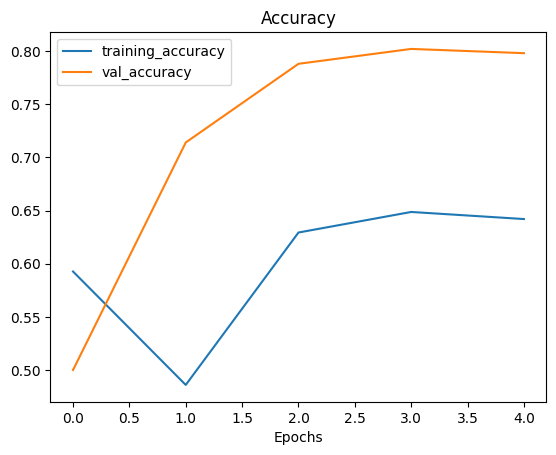

In [ ]:
plot_loss_curves(history_6)

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7=Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 34s 651ms/step - loss: 0.6736 - accuracy: 0.5867 - val_loss: 0.5830 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 22s 460ms/step - loss: 0.5443 - accuracy: 0.7307 - val_loss: 0.4051 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 23s 494ms/step - loss: 0.4831 - accuracy: 0.7667 - val_loss: 0.4079 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 33s 706ms/step - loss: 0.4722 - accuracy: 0.7760 - val_loss: 0.3460 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 46s 967ms/step - loss: 0.4500 - accuracy: 0.8007 - val_loss: 0.3499 - val_accuracy: 0.8480


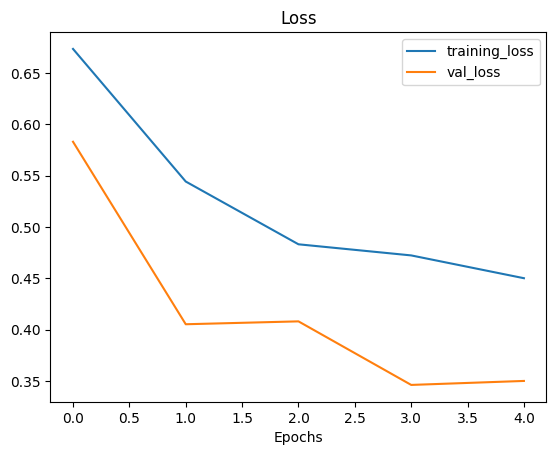

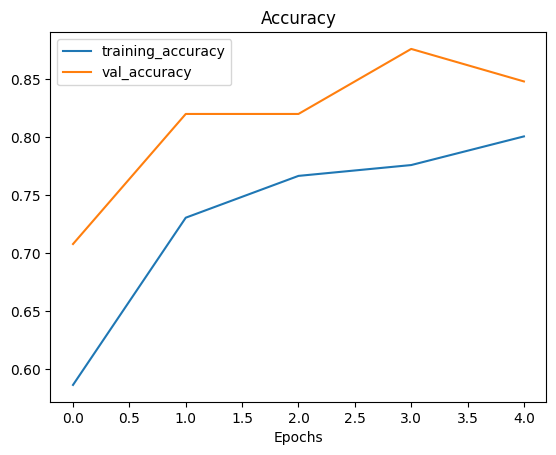

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

In [ ]:
model_8=Sequential([
     Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
     Conv2D(10,3,activation='relu'),
     MaxPool2D(),
     Conv2D(10,3,activation='relu'),
     Conv2D(10,3,activation='relu'),
     MaxPool2D(),
     Flatten(),
     Dense(1,activation='sigmoid')
])
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_8=model_8.fit(train_data_augmented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 489ms/step - loss: 0.6235 - accuracy: 0.6327 - val_loss: 0.4549 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 30s 651ms/step - loss: 0.4874 - accuracy: 0.7767 - val_loss: 0.3274 - val_accuracy: 0.8740
Epoch 3/5
47/47 [==============================] - 28s 610ms/step - loss: 0.4525 - accuracy: 0.7973 - val_loss: 0.3127 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 32s 669ms/step - loss: 0.4369 - accuracy: 0.8093 - val_loss: 0.3249 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 30s 654ms/step - loss: 0.4309 - accuracy: 0.8060 - val_loss: 0.3281 - val_accuracy: 0.8580


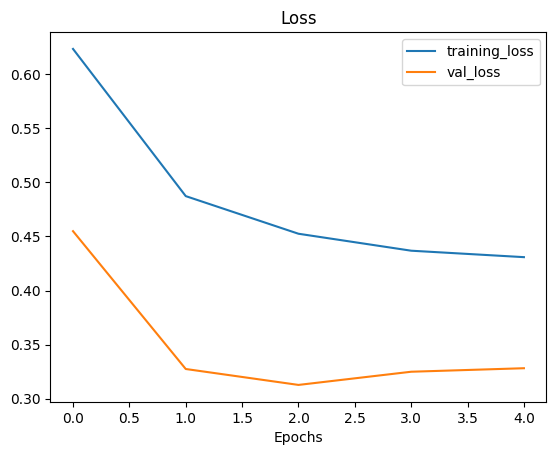

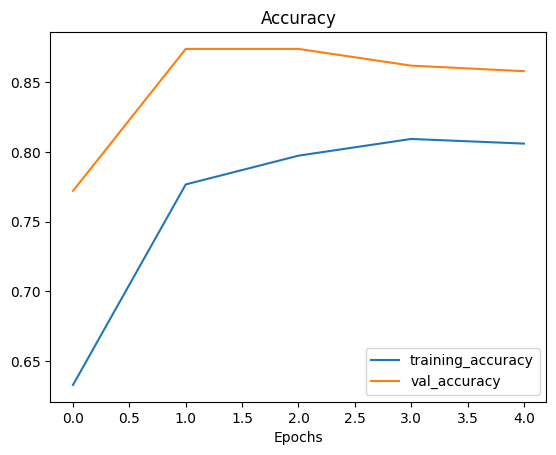

In [ ]:
plot_loss_curves(history_8)

--2023-11-12 08:44:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.008s  

2023-11-12 08:44:44 (241 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



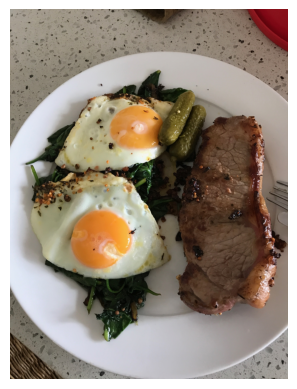

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)

# Create a function to import an image and resize it to be able to be used with our model

In [ ]:
def load_and_prep_image(filename,img_shape=224):
  """
  Reads an image from filename,turns it into a tensor
  and reshapes it to (img_shape,img_shape,colour_channel).
  """
  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img,channels=3)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img=img/255.
  return img

In [ ]:
steak=load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
model_8(steak)

ValueError: ignored

In [ ]:
print(f"shape before new dimension:{steak.shape}")
steak=tf.expand_dims(steak,axis=0)
print(f"shape before new dimension:{steak.shape}")
steak

shape before new dimension:(224, 224, 3)
shape before new dimension:(1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
model_8(steak)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.71472764]], dtype=float32)>

In [ ]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 276ms/step


array([[0.71472764]], dtype=float32)

In [ ]:
pred_class=class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [ ]:
def pred_and_plot(model,filename,class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  img=load_and_prep_image(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))
  pred_class=class_names[int(tf.round(pred)[0][0])]
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False);


1/1 [==============================] - 0s 17ms/step


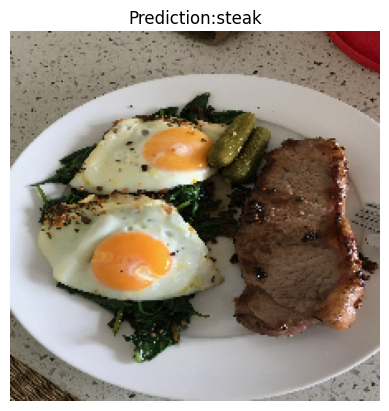

In [ ]:
pred_and_plot(model_8,"03-steak.jpeg",class_names)

--2023-11-12 08:58:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-11-12 08:58:42 (232 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 28ms/step


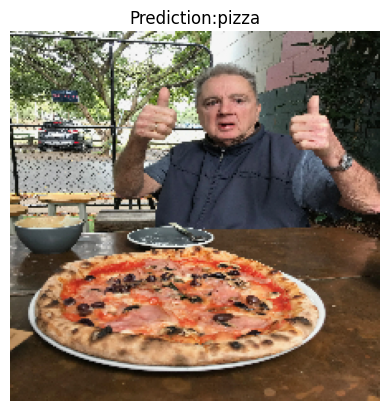

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-11-12 09:02:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.8MB/s    in 23s     

2023-11-12 09:02:42 (21.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 

In [ ]:
train_data="/content/10_food_classes_all_data/train"
test_data="/content/10_food_classes_all_data/test"

In [ ]:
#get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


pizza_steak/train/steak
['2535456.jpg']
Image shape :(512, 512, 3)


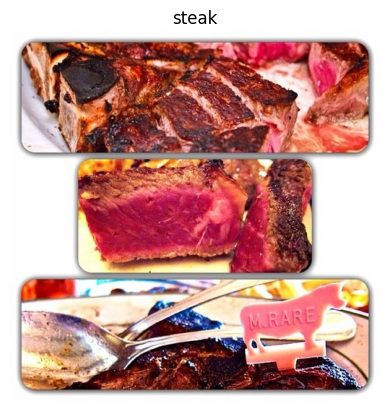

In [ ]:
import random
img=view_random_image(target_dir=train_dir,
                      target_class=random.choice(class_names))

# preprocessing the data(prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
train_data.shape

AttributeError: ignored

In [ ]:
print(f"shape before new dimension:{steak.shape}")
steak=tf.expand_dims(,axis=0)
print(f"shape before new dimension:{steak.shape}")
steak

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_9=model_9.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))


IndexError: ignored

In [ ]:
train_data="/content/10_food_classes_all_data/train"
test_data="/content/10_food_classes_all_data/test"

IndexError: ignored

TypeError: ignored